# Cross-Validation and Its Application

Last time we have discussed stratified cross-validation to address imbalanced datasets for classification. In this lecture, we will


1. discuss the concept of cross-validation in general case.


2. Learn how to implement a polynomial regression

3. implement k-fold CV for polynomial regression.




## Introduction: What is Cross-Validation?

Traditional model evaluation methods often rely on a single train-test split, which can produce unreliable results, especially with small or imbalanced datasets. This approach risks overfitting, where the model performs well on training data but poorly on new data, or underfitting, where it fails to capture key patterns.

Cross-validation addresses these issues by dividing the data into multiple subsets, allowing the model to be trained and tested repeatedly on different splits.

By providing a more accurate estimate of a model's true performance, cross-validation helps us understand its reliability, tune it for generalization, and choose the best configuration.

#### Types of Cross-Validation
1. **K-Fold Cross-Validation**: The data is split into `k` subsets (or folds). The model is trained on `k-1` folds and tested on the remaining fold. This process is repeated `k` times.

2. **Stratified K-Fold**: Useful for imbalanced datasets, ensuring each fold has a similar distribution of classes.

3. **Leave-One-Out Cross-Validation (LOOCV)**: Each data point acts as a test set once. It’s more computationally expensive but provides precise results.

## 1- K-fold Cross-Validation

In K-fold CV, the dataset is randomly divided into *k* equal-sized groups, called folds. For each iteration, one fold is used as the validation set, and the model is trained on the remaining *k-1* folds.

The model's performance is then evaluated on the held-out fold using a measure like mean squared error (MSE). This process is repeated *k* times, each time using a different fold as the validation set. This process results in k estimates of the test error,
MSE1,MSE2, . . . ,MSEk. The k-fold CV estimate is computed by averaging
these values,

Finally, the K-fold CV estimate is the average of the *k* MSE values, giving a more reliable estimate of the model’s performance.








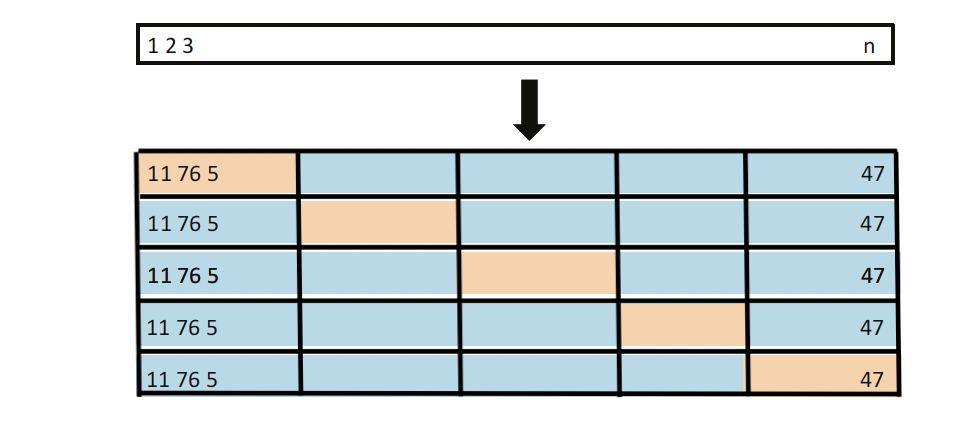

## 2. Polynomial Regression

Consider the following Auto dataset, that contanis information about cars. We want to see if we can predict mpg using hourse power using linear regression.

To access the dataset, you will need the following library


In [1]:
pip install ISLP

let's import the necessary libraries and explore the dataset

In [12]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize ,poly)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [13]:
Auto = load_data('Auto')

In [14]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


Looks clean! Now we use the function `train_test_split()` to split the data into training train_test_and validation sets. As there are 392 observations, we split into two equal split sets of size 196 using the argument test_size=196.

In [16]:
Auto_train , Auto_test = train_test_split(Auto ,test_size=196, random_state=0)

In [17]:
# Step 1: Extract features and target variable
X_train = Auto_train[['horsepower']]
y_train = Auto_train['mpg']

X_test = Auto_test[['horsepower']]
y_test = Auto_test['mpg']

In [18]:
# Step 2: Scale the feature 'horsepower'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

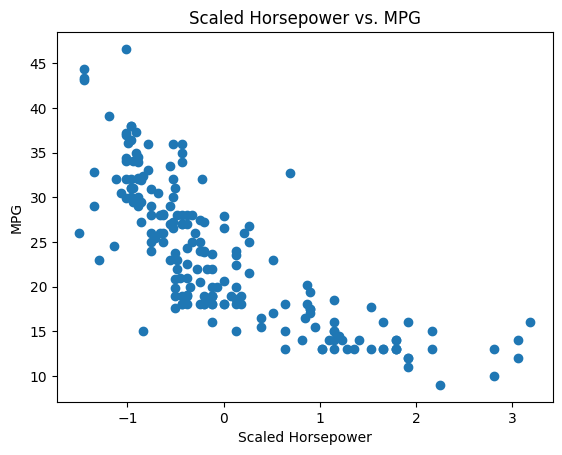

In [19]:
#Let's plot them against each other
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled, y_train)
plt.xlabel('Scaled Horsepower')
plt.ylabel('MPG')
plt.title('Scaled Horsepower vs. MPG')
plt.show()

Seems like both a line and a quadratic equation can describe relation between the two. Let's use a Polynomial Regression!

In [20]:
# Polynomial features (degree 2 for quadratic fit) ax^2 + bx + c
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
# Initialize the model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
# Make predictions on the entire dataset
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [25]:
#Train MSE
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 19.22


In [26]:
# test MSE
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 18.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


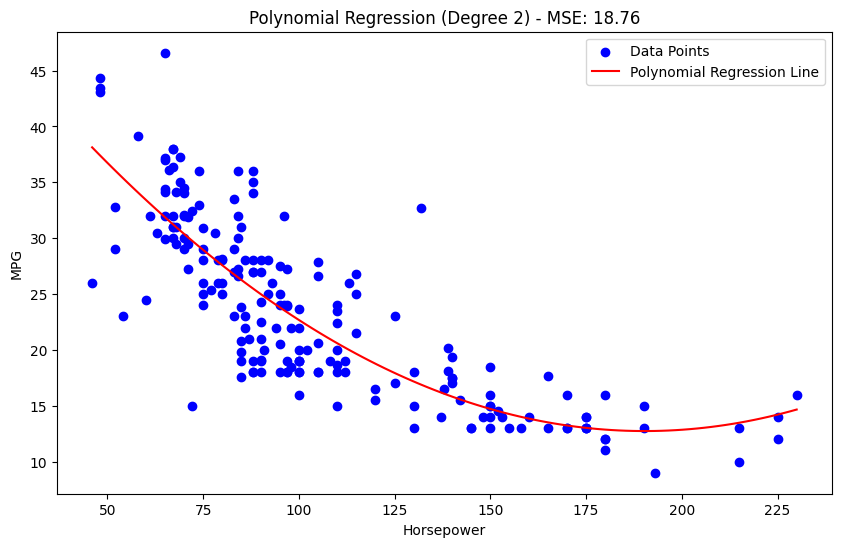

<Figure size 640x480 with 0 Axes>

In [30]:
# let's plot the regression curve
import matplotlib.pyplot as plt
import numpy as np


# Plot the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Data Points')


# Generate a range of values for horsepower
hp_range = np.linspace(X_train['horsepower'].min(), X_train['horsepower'].max(), 100).reshape(-1, 1)

# Create polynomial features for this range
hp_poly_range = poly.transform(hp_range)

# Plot the regression line
plt.plot(hp_range, model.predict(hp_poly_range), color='red', label='Polynomial Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression (Degree 2) - MSE: {mse:.2f}')
plt.legend()
plt.show()

# Show the plots
plt.tight_layout()
plt.show()

## k-fold CV for a Polynomial Regression

Now let's combine them! We will use a 5-fold cross validation for this dataset!

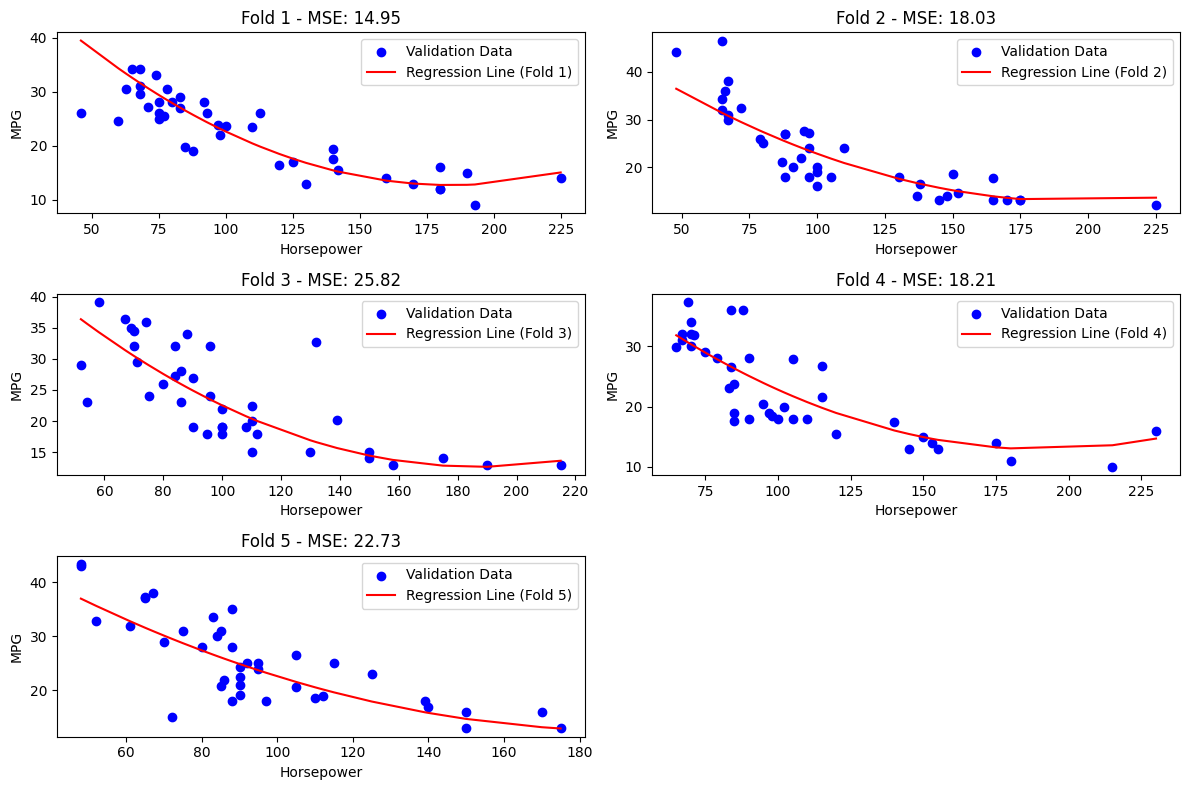

Mean Squared Errors for each fold:
Fold 1: 14.95
Fold 2: 18.03
Fold 3: 25.82
Fold 4: 18.21
Fold 5: 22.73

Average MSE across all folds: 19.95


In [89]:
#Start over with feature and target value
X = Auto_train[['horsepower']]  # Features
y = Auto_train['mpg']           # Target

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the polynomial feature transformer, scaler, and model
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()
model = LinearRegression()

# List to store MSE for each fold
mse_list = []

# Create a plot to show the regression curve for each fold
plt.figure(figsize=(12, 8))

# Perform K-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Transform features into polynomial terms


    # Scale the polynomial features


    # Fit the model on the training data


    # Make predictions on the validation data


    # Compute MSE for the current fold


    # Store the above MSE in mse_list


    # Plot the regression line for this fold (this is generated by ChatGPT)
    plt.subplot(3, 2, fold)  # 3 rows, 2 columns, fold number
    plt.scatter(X_val, y_val, color='blue', label='Validation Data')
    # Sort X_val and corresponding predictions for a smooth line plot
    sorted_idx = X_val.values.flatten().argsort()
    plt.plot(X_val.values.flatten()[sorted_idx], y_pred[sorted_idx], color='red', label=f'Regression Line (Fold {fold})')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Fold {fold} - MSE: {mse:.2f}')
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print the MSE for each fold and the average MSE
print("Mean Squared Errors for each fold:")
for fold, mse in enumerate(mse_list, 1):
    print(f"Fold {fold}: {mse:.2f}")

average_mse = np.mean(mse_list)
print(f"\nAverage MSE across all folds: {average_mse:.2f}")
